In [1]:

library(cubature)
library(MASS)
library(pracma)
library(mvtnorm)

library(LogConcDEAD)
library(logcondens) 

library(plot3D)

library(mclust)



Warning message:
“no DISPLAY variable so Tk is not available”
Package 'mclust' version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:mvtnorm’:

    dmvnorm




In [32]:
source('lcic.r')

In [2]:
# DATFILE <- '/mnt/geofflab/st_denoising_data/adata/Mouse_embryo_E9_5.h5ad'

# Convert(DATFILE, dest = "h5seurat", overwrite = FALSE)
# adata <- LoadH5Seurat('/mnt/geofflab/st_denoising_data/adata/Mouse_embryo_E9_5.h5seurat')
# adata

In [9]:
feature_data <- read.csv('Data/mosta_E9_5_reduced_pca.csv', header=FALSE)
celltype_data <- read.csv('Data/mosta_E9_5_reduced_anno.csv', header=TRUE)

In [11]:
feature_data
# celltype_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.744576,-0.6275037,2.2745047,-0.2159602,3.5036802,2.8756735,-5.682264805,-2.7410741,1.3166267,-0.68843585,⋯,1.27140653,0.93092334,-0.82880229,2.84753561,0.40568528,1.44312513,1.12306905,-0.3653078,0.80385810,-1.9199997
9.182390,5.3634815,-3.0496874,4.3447766,0.7567700,-1.0402665,-2.026623249,3.5514636,-0.2514779,1.30154860,⋯,0.53057402,-1.27258420,-0.08477946,-0.05854793,-0.45799232,-0.17031276,0.05096027,-0.2256749,0.43424043,-1.4144322
8.342176,6.8174143,-2.1811843,2.8378110,-0.3306123,-0.2149567,-2.933109999,2.1721864,-0.7162834,0.91382897,⋯,1.24010193,0.57316202,0.80057836,-2.98498940,1.61141098,2.23555660,0.84368730,0.2593509,-0.29618335,-0.4485858
10.964391,8.9678469,0.4032165,9.2636623,-0.5446818,-3.5485506,0.898321331,1.2163646,0.3194554,2.11617303,⋯,0.63081723,-2.01891947,0.39486602,-1.06583929,0.92077017,-0.19030850,-1.12873125,-0.5757723,0.43851677,-0.6353171
12.338865,8.2325020,1.8105049,12.2598572,-1.3261442,-2.0182719,1.402295589,-1.2021248,-0.4689021,1.56439126,⋯,0.09975164,0.82634884,-0.38524595,0.19823734,0.59568459,-0.17270637,-1.56104457,0.1480814,1.54462028,0.1488267
12.139897,10.3868294,0.6490743,9.6154270,-2.0866003,-2.2594831,1.367748857,0.4610560,-1.4505570,0.56244707,⋯,-0.01951391,-0.75808400,-0.25315282,-0.42602715,-0.04965521,-0.48573866,-0.02779141,-0.1745265,-0.07886706,-2.0924928
11.321191,10.9268885,1.1134373,8.6164236,-1.9698893,-1.4704039,0.581589818,0.6434437,-1.0580113,1.92984450,⋯,0.72884923,-1.02216423,-0.45339677,-2.21608710,0.71230477,0.76666385,0.32556406,-0.9073472,0.34140974,0.6092433
6.581294,7.2226300,-1.5157796,7.8152547,-2.4079168,-0.6406718,-1.624695301,0.3736056,-1.8928674,1.73312688,⋯,0.84017235,1.19133294,0.37391213,-1.29049480,1.30394995,-2.26257443,-1.76509249,0.3408076,-0.37774783,-0.4466654
12.611067,6.9259453,-2.1875358,10.1724253,0.8902723,-3.2182505,0.495814592,2.0892534,-0.5819854,1.96539021,⋯,-0.64620632,0.45876884,2.31892610,-1.26027656,-0.96448946,-0.40568152,-1.31846559,0.4197431,1.20386982,-0.2343850


In [12]:
feature_mat <- data.matrix(feature_data)
feature_mat

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
1.744576,-0.6275037,2.2745047,-0.2159602,3.5036802,2.8756735,-5.682264805,-2.7410741,1.3166267,-0.68843585,⋯,1.27140653,0.93092334,-0.82880229,2.84753561,0.40568528,1.44312513,1.12306905,-0.3653078,0.80385810,-1.9199997
9.182390,5.3634815,-3.0496874,4.3447766,0.7567700,-1.0402665,-2.026623249,3.5514636,-0.2514779,1.30154860,⋯,0.53057402,-1.27258420,-0.08477946,-0.05854793,-0.45799232,-0.17031276,0.05096027,-0.2256749,0.43424043,-1.4144322
8.342176,6.8174143,-2.1811843,2.8378110,-0.3306123,-0.2149567,-2.933109999,2.1721864,-0.7162834,0.91382897,⋯,1.24010193,0.57316202,0.80057836,-2.98498940,1.61141098,2.23555660,0.84368730,0.2593509,-0.29618335,-0.4485858
10.964391,8.9678469,0.4032165,9.2636623,-0.5446818,-3.5485506,0.898321331,1.2163646,0.3194554,2.11617303,⋯,0.63081723,-2.01891947,0.39486602,-1.06583929,0.92077017,-0.19030850,-1.12873125,-0.5757723,0.43851677,-0.6353171
12.338865,8.2325020,1.8105049,12.2598572,-1.3261442,-2.0182719,1.402295589,-1.2021248,-0.4689021,1.56439126,⋯,0.09975164,0.82634884,-0.38524595,0.19823734,0.59568459,-0.17270637,-1.56104457,0.1480814,1.54462028,0.1488267
12.139897,10.3868294,0.6490743,9.6154270,-2.0866003,-2.2594831,1.367748857,0.4610560,-1.4505570,0.56244707,⋯,-0.01951391,-0.75808400,-0.25315282,-0.42602715,-0.04965521,-0.48573866,-0.02779141,-0.1745265,-0.07886706,-2.0924928
11.321191,10.9268885,1.1134373,8.6164236,-1.9698893,-1.4704039,0.581589818,0.6434437,-1.0580113,1.92984450,⋯,0.72884923,-1.02216423,-0.45339677,-2.21608710,0.71230477,0.76666385,0.32556406,-0.9073472,0.34140974,0.6092433
6.581294,7.2226300,-1.5157796,7.8152547,-2.4079168,-0.6406718,-1.624695301,0.3736056,-1.8928674,1.73312688,⋯,0.84017235,1.19133294,0.37391213,-1.29049480,1.30394995,-2.26257443,-1.76509249,0.3408076,-0.37774783,-0.4466654
12.611067,6.9259453,-2.1875358,10.1724253,0.8902723,-3.2182505,0.495814592,2.0892534,-0.5819854,1.96539021,⋯,-0.64620632,0.45876884,2.31892610,-1.26027656,-0.96448946,-0.40568152,-1.31846559,0.4197431,1.20386982,-0.2343850
13.274303,8.8636227,2.0824904,11.4368334,-1.7388084,-3.5267513,1.649624586,0.3848505,-0.5358114,2.97521544,⋯,0.56452370,-0.51006520,1.37967682,-1.37767482,2.02779627,-1.01371443,-1.54307377,0.1652117,-0.57371336,-0.3863829


In [17]:
celltype_vec <- celltype_data[,2]

In [21]:
all_celltypes <- c('Brain', 'Heart', 'Neural crest')

In [34]:
RealDataHD <- package_real_data(feature_mat)

In [98]:
num_clusters <- 3

theta_mat_init_hc <- initialize_EM(RealDataHD, num_clusters)
theta_mat_init_hc_noisy <- theta_mat_init_hc + matrix(runif(RealDataHD$n*num_clusters, min=0, max=0.25), nrow=RealDataHD$n)
theta_mat_init_hc_noisy <- theta_mat_init_hc_noisy/rowSums(theta_mat_init_hc_noisy)
theta_mat_init_rand <- matrix(0, nrow=RealDataHD$n, ncol=num_clusters)
possible_assignments <- matrix(c(0.2,0.2,0.6, 0.2,0.6,0.2, 0.6,0.2,0.2), nrow=3) 

theta_mat_init_rand <- possible_assignments[sample(c(1,2,3), size=RealDataHD$n, replace=TRUE), ]


In [99]:
t_start <- Sys.time()
em_output_HD <- EM_with_lcic(RealDataHD, theta_mat_init_rand, num_clusters, resample_factors=c(4,4), num_iter=50, theps=1e-7)
t_end <- Sys.time()
time_taken <- difftime(t_end, t_start, units="secs")

[1] "Iter: "
[1] 1
[1] "PCA done!"
[1] "NA check:"
[1] FALSE
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Marginal: "
[1] 3
[1] "Marginal: "
[1] 4
[1] "Marginal: "
[1] 5
[1] "Marginal: "
[1] 6
[1] "Marginal: "
[1] 7
[1] "Marginal: "
[1] 8
[1] "Marginal: "
[1] 9
[1] "Marginal: "
[1] 10
[1] "Marginal: "
[1] 11
[1] "Marginal: "
[1] 12
[1] "Marginal: "
[1] 13
[1] "Marginal: "
[1] 14
[1] "Marginal: "
[1] 15
[1] "Marginal: "
[1] 16
[1] "Marginal: "
[1] 17
[1] "Marginal: "
[1] 18
[1] "Marginal: "
[1] 19
[1] "Marginal: "
[1] 20
[1] "Marginal: "
[1] 21
[1] "Marginal: "
[1] 22
[1] "Marginal: "
[1] 23
[1] "Marginal: "
[1] 24
[1] "Marginal: "
[1] 25
[1] "Marginal: "
[1] 26
[1] "Marginal: "
[1] 27
[1] "Marginal: "
[1] 28
[1] "Marginal: "
[1] 29
[1] "Marginal: "
[1] 30
[1] "Marginal: "
[1] 31
[1] "Marginal: "
[1] 32
[1] "Marginal: "
[1] 33
[1] "Marginal: "
[1] 34
[1] "Marginal: "
[1] 35
[1] "Marginal: "
[1] 36
[1] "Marginal: "
[1] 37
[1] "Marginal: "
[1] 38
[1] "Marginal: "
[1] 39
[1] "Margina

In [100]:
time_taken

Time difference of 1372.667 secs

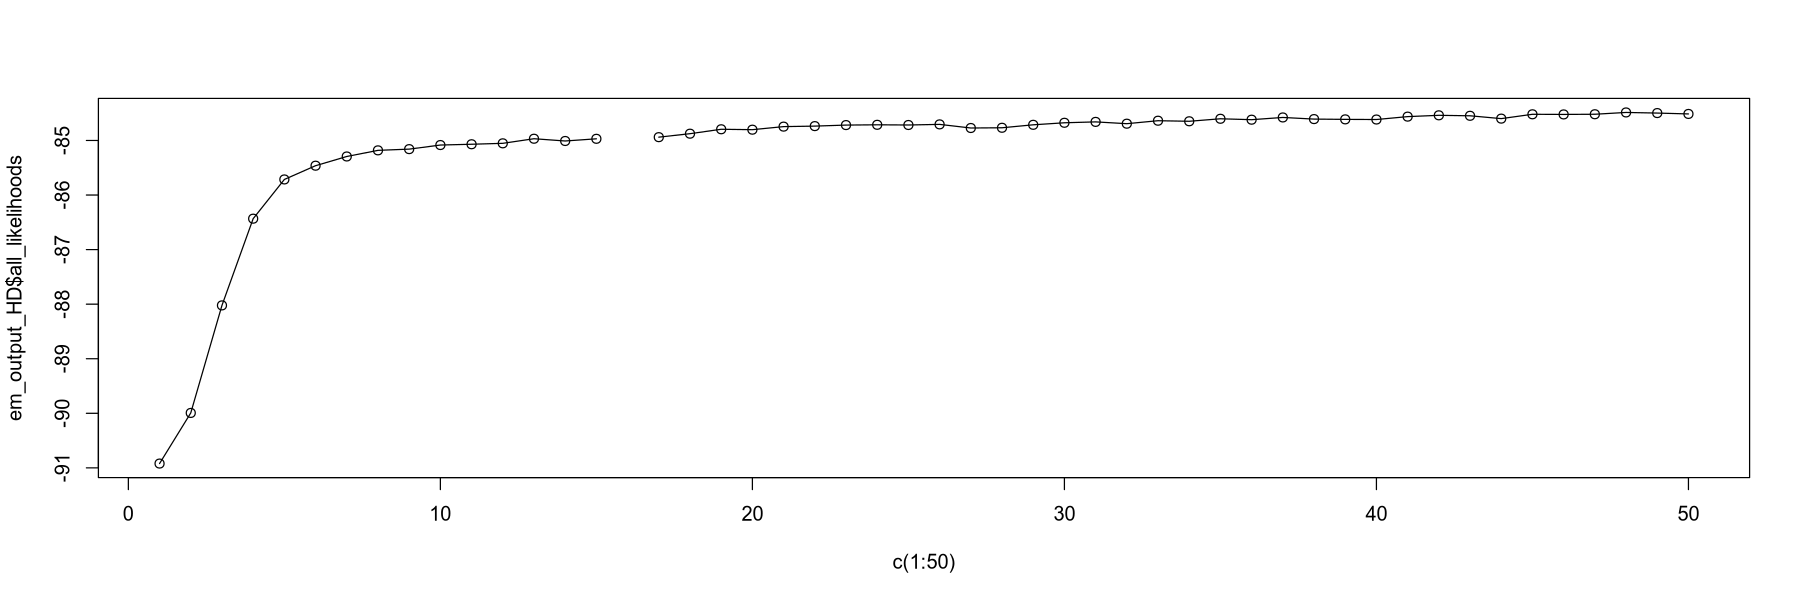

In [101]:
plot(c(1:50), em_output_HD$all_likelihoods)
lines(c(1:50), em_output_HD$all_likelihoods, lty=1)

In [102]:
cluster_predictions_hc <- max.col(theta_mat_init_hc)
cluster_predictions_lcic <- max.col(em_output_HD$theta_mat)



In [103]:
em_output_HD$pi_vec

[1] 0.2609498 0.3497194 0.3893308

In [104]:
# Plotting densities
xg <- seq(-20, 20, by=0.4)
yg <- seq(-15, 20, by=0.4)

gridmat <- data.matrix(expand.grid(xg, yg))

gridmat_padded <- matrix(0, nrow=nrow(gridmat), ncol=RealDataHD$d)
gridmat_padded[ , 1:2] <- gridmat
gridmat_padded

-20.0,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-19.6,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-19.2,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-18.8,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-18.4,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-18.0,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-17.6,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-17.2,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-16.8,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-16.4,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
-16.0,-15,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [105]:
z_vals_d1 <- evaluate_logcondens_estimator_vectorized(gridmat_padded, em_output_HD$cluster_densities[[1]])
z_vals_d1 <- matrix(z_vals_d1, nrow=length(xg))

z_vals_d2 <- evaluate_logcondens_estimator_vectorized(gridmat_padded, em_output_HD$cluster_densities[[2]])
z_vals_d2 <- matrix(z_vals_d2, nrow=length(xg))

z_vals_d3 <- evaluate_logcondens_estimator_vectorized(gridmat_padded, em_output_HD$cluster_densities[[3]])
z_vals_d3 <- matrix(z_vals_d3, nrow=length(xg))

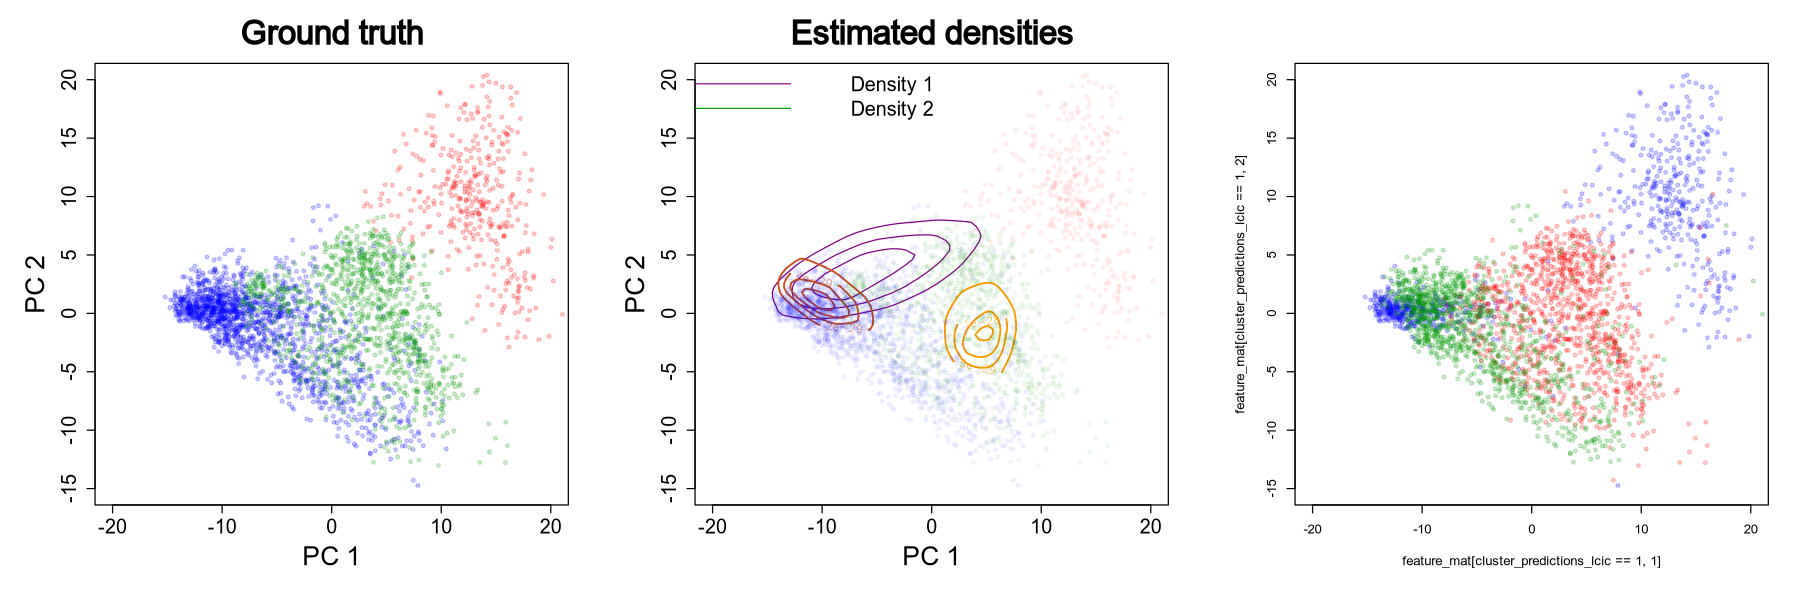

In [106]:
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1, 3), mar=c(6,6,4,2))
plot(x=feature_mat[celltype_vec=='Brain',1], y=feature_mat[celltype_vec=='Brain',2], pch=20, col=rgb(0,0,1,0.2), cex.lab=2, cex.axis=1.5,
    xlab="PC 1", ylab="PC 2", xlim=c(-20,20), ylim=c(-15,20), main="Ground truth", cex.main=2.5)
points(x=feature_mat[celltype_vec=='Heart',1], y=feature_mat[celltype_vec=='Heart',2], pch=20, col=rgb(1,0,0,0.2))
points(x=feature_mat[celltype_vec=='Neural crest',1], y=feature_mat[celltype_vec=='Neural crest',2], pch=20, col=rgb(0,0.6,0,0.2))

contour(xg, yg, z_vals_d1, xlim=c(-20,20), ylim=c(-15,20), drawlabels=FALSE, nlevels=6, col=rgb(0.5,0,0.5,1), cex.lab=2, cex.axis=1.5,
    xlab="PC 1", ylab="PC 2", main="Estimated densities", cex.main=2.5)
contour(xg, yg, z_vals_d2, add=TRUE, nlevels=6, col=rgb(1,0.6,0,1), lwd=1.5)
contour(xg, yg, z_vals_d3, add=TRUE, nlevels=6, col=rgb(0.8,0.3,0.1,1), lwd=1.5)

points(x=feature_mat[celltype_vec=='Brain',1], y=feature_mat[celltype_vec=='Brain',2], pch=20, col=rgb(0,0,1,0.05))
points(x=feature_mat[celltype_vec=='Heart',1], y=feature_mat[celltype_vec=='Heart',2], pch=20, col=rgb(1,0,0,0.05))
points(x=feature_mat[celltype_vec=='Neural crest',1], y=feature_mat[celltype_vec=='Neural crest',2], pch=20, col=rgb(0,0.6,0,0.05))


legend(x="topright", legend=c("Density 1", "Density 2"), col=c(rgb(0.5,0,0.5,1), rgb(0,0.6,0,1)), lty=c(1,1),
       cex=1.5, seg.len=2, y.intersp=1.5, bty="n")

plot(x=feature_mat[cluster_predictions_lcic==1,1], y=feature_mat[cluster_predictions_lcic==1,2], pch=20, col=rgb(0,0,1,0.2),
    xlim=c(-20,20), ylim=c(-15,20))
points(x=feature_mat[cluster_predictions_lcic==2,1], y=feature_mat[cluster_predictions_lcic==2,2], pch=20, col=rgb(1,0,0,0.2))
points(x=feature_mat[cluster_predictions_lcic==3,1], y=feature_mat[cluster_predictions_lcic==3,2], pch=20, col=rgb(0,0.6,0,0.2))


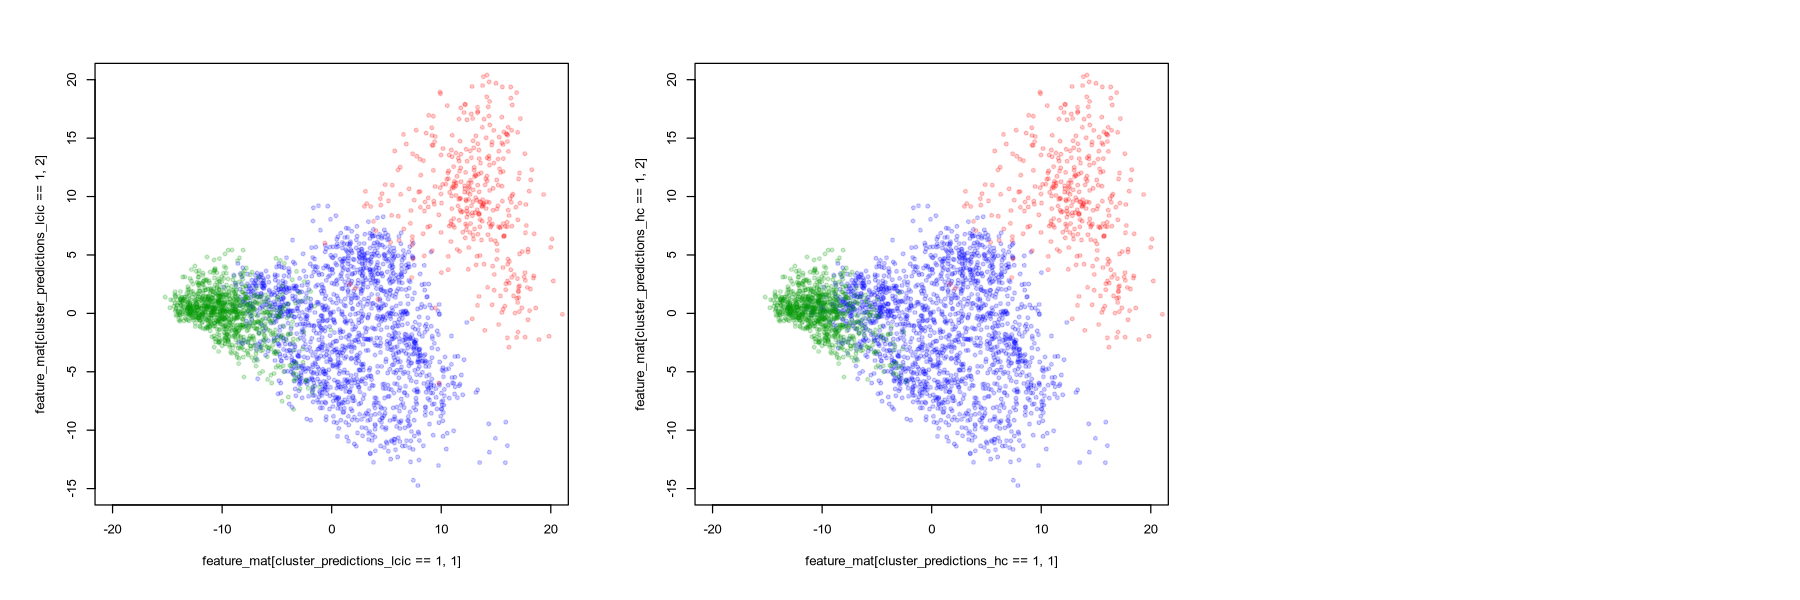

In [95]:
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1, 3), mar=c(6,6,4,2))
plot(x=feature_mat[cluster_predictions_lcic==1,1], y=feature_mat[cluster_predictions_lcic==1,2], pch=20, col=rgb(0,0,1,0.2),
    xlim=c(-20,20), ylim=c(-15,20))
points(x=feature_mat[cluster_predictions_lcic==2,1], y=feature_mat[cluster_predictions_lcic==2,2], pch=20, col=rgb(1,0,0,0.2))
points(x=feature_mat[cluster_predictions_lcic==3,1], y=feature_mat[cluster_predictions_lcic==3,2], pch=20, col=rgb(0,0.6,0,0.2))

plot(x=feature_mat[cluster_predictions_hc==1,1], y=feature_mat[cluster_predictions_hc==1,2], pch=20, col=rgb(0,0,1,0.2),
    xlim=c(-20,20), ylim=c(-15,20))
points(x=feature_mat[cluster_predictions_hc==2,1], y=feature_mat[cluster_predictions_hc==2,2], pch=20, col=rgb(1,0,0,0.2))
points(x=feature_mat[cluster_predictions_hc==3,1], y=feature_mat[cluster_predictions_hc==3,2], pch=20, col=rgb(0,0.6,0,0.2))

In [96]:
norm(em_output_HD$theta_mat - theta_mat_init_hc)/norm(theta_mat_init_hc)

[1] 0.09372122

In [60]:
possible_assignments <- matrix(c(0.2,0.2,0.6, 0.2,0.6,0.2, 0.6,0.2,0.2), nrow=3) 

theta_mat_init_rand <- possible_assignments[sample(c(1,2,3), size=5, replace=TRUE), ]

In [61]:
theta_mat_init_rand

0.2,0.6,0.2
0.6,0.2,0.2
0.2,0.6,0.2
0.2,0.6,0.2
0.2,0.2,0.6


In [3]:
?read.csv

read.table {utils},R Documentation
file,"the name of the file which the data are to be read from. Each row of the table appears as one line of the file. If it does not contain an absolute path, the file name is relative to the current working directory, getwd(). Tilde-expansion is performed where supported. This can be a compressed file (see file). Alternatively, file can be a readable text-mode connection (which will be opened for reading if necessary, and if so closed (and hence destroyed) at the end of the function call). (If stdin() is used, the prompts for lines may be somewhat confusing. Terminate input with a blank line or an EOF signal, Ctrl-D on Unix and Ctrl-Z on Windows. Any pushback on stdin() will be cleared before return.) file can also be a complete URL. (For the supported URL schemes, see the ‘URLs’ section of the help for url.)"
header,"a logical value indicating whether the file contains the names of the variables as its first line. If missing, the value is determined from the file format: header is set to TRUE if and only if the first row contains one fewer field than the number of columns."
sep,"the field separator character. Values on each line of the file are separated by this character. If sep = """" (the default for read.table) the separator is ‘white space’, that is one or more spaces, tabs, newlines or carriage returns."
quote,"the set of quoting characters. To disable quoting altogether, use quote = """". See scan for the behaviour on quotes embedded in quotes. Quoting is only considered for columns read as character, which is all of them unless colClasses is specified."
dec,the character used in the file for decimal points.
numerals,"string indicating how to convert numbers whose conversion to double precision would lose accuracy, see type.convert. Can be abbreviated. (Applies also to complex-number inputs.)"
row.names,"a vector of row names. This can be a vector giving the actual row names, or a single number giving the column of the table which contains the row names, or character string giving the name of the table column containing the row names. If there is a header and the first row contains one fewer field than the number of columns, the first column in the input is used for the row names. Otherwise if row.names is missing, the rows are numbered. Using row.names = NULL forces row numbering. Missing or NULL row.names generate row names that are considered to be ‘automatic’ (and not preserved by as.matrix)."
col.names,"a vector of optional names for the variables. The default is to use ""V"" followed by the column number."
as.is,"controls conversion of character variables (insofar as they are not converted to logical, numeric or complex) to factors, if not otherwise specified by colClasses. Its value is either a vector of logicals (values are recycled if necessary), or a vector of numeric or character indices which specify which columns should not be converted to factors. Note: to suppress all conversions including those of numeric columns, set colClasses = ""character"". Note that as.is is specified per column (not per variable) and so includes the column of row names (if any) and any columns to be skipped."
tryLogical,"a logical determining if columns consisting entirely of ""F"", ""T"", ""FALSE"", and ""TRUE"" should be converted to logical; passed to type.convert, true by default."
